In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

In [52]:
df = pd.read_csv(r"C:\Users\kyrie\ironhack-Final-Project\final_project\home.csv")

In [53]:
df

,Unnamed: 0,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,PLUS_MINUS,colscatt
0,1,2022-03-09,22100984,1610612749,1610612737,2021,124.0,0.500,0.783,0.343,...,3.0,9.0,12.0,5.0,1.0,0.0,2.0,43.0,3.0,0.00
1,3,2022-03-06,22100961,1610612749,1610612756,2021,132.0,0.540,0.793,0.469,...,3.0,10.0,13.0,6.0,1.0,3.0,3.0,19.0,-8.0,0.05
2,5,2022-03-02,22100936,1610612749,1610612748,2021,120.0,0.451,0.889,0.389,...,4.0,13.0,17.0,5.0,2.0,1.0,4.0,28.0,7.0,0.10
3,6,2022-02-28,22100924,1610612749,1610612766,2021,130.0,0.440,0.865,0.400,...,3.0,13.0,16.0,6.0,2.0,4.0,3.0,26.0,25.0,0.15
4,7,2022-02-26,22100910,1610612749,1610612751,2021,123.0,0.526,0.658,0.421,...,0.0,14.0,14.0,6.0,1.0,0.0,4.0,29.0,-8.0,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,743,2014-11-05,21400062,1610612749,1610612741,2014,86.0,0.371,0.850,0.200,...,2.0,6.0,8.0,1.0,0.0,0.0,0.0,13.0,7.0,18.60
373,746,2014-10-31,21400023,1610612749,1610612755,2014,93.0,0.409,0.571,0.375,...,1.0,5.0,6.0,2.0,0.0,1.0,4.0,8.0,-9.0,18.65
374,748,2014-10-22,11400100,1610612749,1610612750,2014,91.0,0.402,0.818,0.280,...,2.0,3.0,5.0,3.0,4.0,3.0,8.0,1.0,-14.0,18.70
375,752,2014-10-11,11400037,1610612749,1610612741,2014,85.0,0.353,0.700,0.250,...,0.0,6.0,6.0,1.0,1.0,2.0,3.0,11.0,4.0,18.75


In [54]:
df.HOME_TEAM_WINS.value_counts()

1    236
0    141
Name: HOME_TEAM_WINS, dtype: int64

# features selection

In [55]:
df.columns

Index(['Unnamed: 0', 'GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home',
       'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away',
       'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS',
       'TEAM_ID', 'TEAM_CITY', 'PLAYER_ID', 'PLAYER_NAME', 'START_POSITION',
       'MIN', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS',
       'PLUS_MINUS', 'colscatt'],
      dtype='object')

In [56]:
df = df[['VISITOR_TEAM_ID','SEASON','MIN', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FT_PCT', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TO', 'PTS',
       'PLUS_MINUS','HOME_TEAM_WINS']]

<AxesSubplot:>

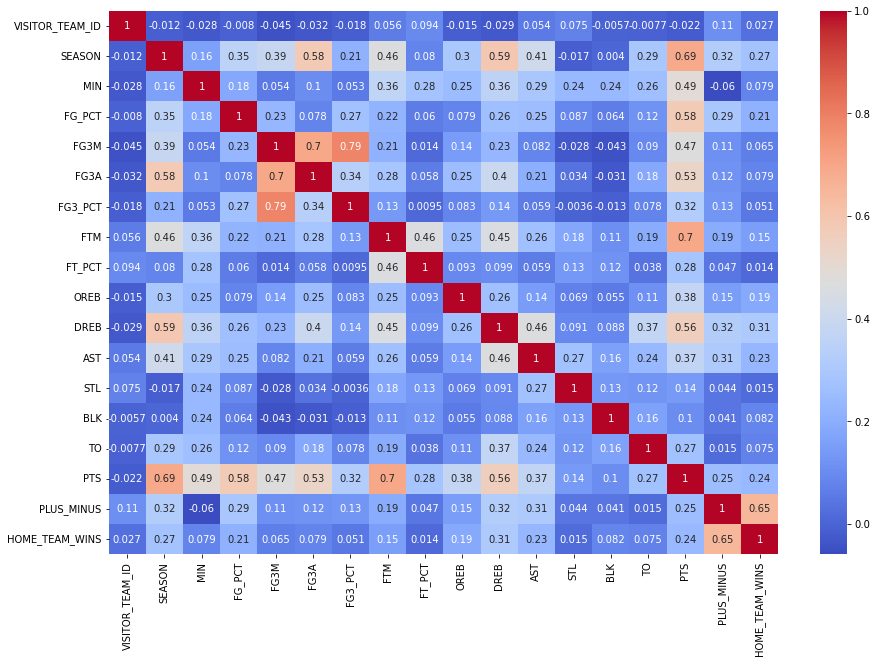

In [57]:
corr = df.corr()
# Set up the figure size
plt.figure(figsize=(15, 10))
# Draw the heatmap with the annotations and the right color
sns.heatmap(corr, annot=True, cmap= 'coolwarm')

In [58]:
# split dataset with features
X = df[['VISITOR_TEAM_ID','SEASON','MIN', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FT_PCT', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TO', 'PTS',
       'PLUS_MINUS']]
y = df['HOME_TEAM_WINS']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# TPOT

In [60]:
# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

ModuleNotFoundError: No module named 'tpot'

In [ ]:
from tpot import TPOTClassifier

In [ ]:
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [ ]:
pipeline_optimizer.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8364296081277212

Generation 2 - Current best internal CV score: 0.8406386066763425

Generation 3 - Current best internal CV score: 0.8442670537010161

Generation 4 - Current best internal CV score: 0.8442670537010161

Generation 5 - Current best internal CV score: 0.8443396226415094

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=1.0, min_samples_leaf=7, min_samples_split=15, n_estimators=100)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

# extra trees classifier

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [62]:
from sklearn.ensemble import ExtraTreesClassifier

# Building the model
extra_tree_forest = ExtraTreesClassifier( bootstrap=True, criterion='gini', max_features=1.0, min_samples_leaf=7, min_samples_split=15, n_estimators=100)
# Training the model
extra_tree_forest.fit(X, y)

ExtraTreesClassifier(bootstrap=True, max_features=1.0, min_samples_leaf=7,
                     min_samples_split=15)

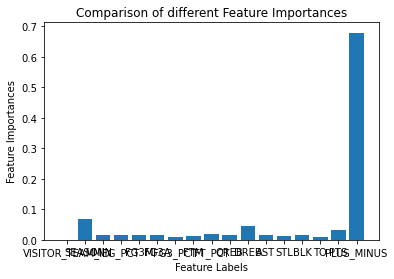

In [63]:
# Computing the importance of each feature
#Feature Importance
feature_importance = extra_tree_forest.feature_importances_
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [64]:
etc = ExtraTreesClassifier(bootstrap=True, criterion='gini', max_features=1.0, min_samples_leaf=7, min_samples_split=15, n_estimators=100)
etc.fit(X_train, y_train)
y_pred_etc = etc.predict(X_test)
acc_etc = etc.score(X_test, y_test)
print('The accuracy of the extra trees Classifier is:', acc_etc * 100, '%')

The accuracy of the extra trees Classifier is: 83.33333333333334 %


In [65]:
#print accuracy of model
print(metrics.accuracy_score(y_test, y_pred_etc))

0.8333333333333334


In [66]:
print(metrics.precision_score(y_test, y_pred_etc))

0.8513513513513513


In [67]:
#print recall value of model
print(metrics.recall_score(y_test,y_pred_etc))

0.8873239436619719


In [68]:
from sklearn.metrics import roc_auc_score

metrics.roc_auc_score(y_test, y_pred_etc)

0.8157549950867999

In [69]:
y_pred_etc=etc.predict(X_test)
y_pred_etc

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1], dtype=int64)

In [70]:
metrics.confusion_matrix(y_test, y_pred_etc)

array([[32, 11],
       [ 8, 63]], dtype=int64)

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

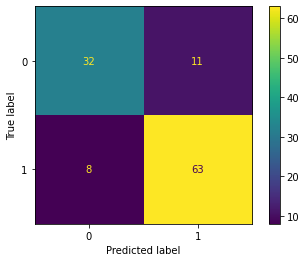

In [72]:
cm = confusion_matrix(y_test, y_pred_etc, labels=etc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=etc.classes_)
disp.plot()
plt.show()

# Linear SVC

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svc = LinearSVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
acc_svc = svc.score(X_test, y_test)
print('The accuracy of the Linear SV Classifier is:', acc_svc * 100, '%')

The accuracy of the Linear SV Classifier is: 62.28070175438597 %


c:\Users\kyrie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
print(svc.predict(X_test))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [ ]:
y_pred_svc=svc.predict(X_test)

In [ ]:
#print accuracy of model
print(metrics.accuracy_score(y_test,y_pred_svc))

0.6228070175438597


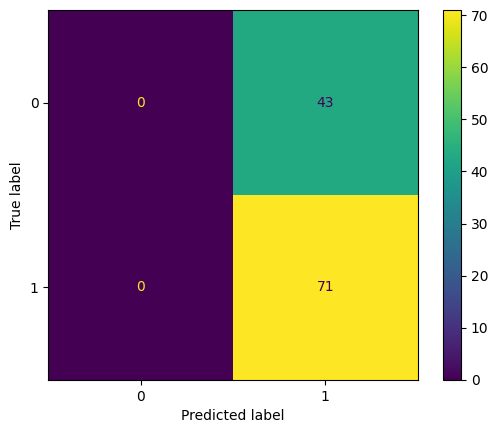

In [ ]:
cm = confusion_matrix(y_test, y_pred_svc, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=svc.classes_)
disp.plot()
plt.show()

# KNN Classifier

------------- 1 -------------------
[[24 19]
 [16 55]]
------------- 2 -------------------
[[32 11]
 [27 44]]
------------- 3 -------------------
[[24 19]
 [13 58]]
------------- 4 -------------------
[[29 14]
 [19 52]]
------------- 5 -------------------
[[26 17]
 [ 9 62]]
------------- 6 -------------------
[[28 15]
 [16 55]]
------------- 7 -------------------
[[22 21]
 [10 61]]
------------- 8 -------------------
[[29 14]
 [15 56]]
------------- 9 -------------------
[[22 21]
 [11 60]]
------------- 10 -------------------
[[25 18]
 [15 56]]
------------- 11 -------------------
[[21 22]
 [11 60]]
------------- 12 -------------------
[[24 19]
 [13 58]]
------------- 13 -------------------
[[19 24]
 [ 9 62]]
------------- 14 -------------------
[[20 23]
 [15 56]]
------------- 15 -------------------
[[16 27]
 [10 61]]
------------- 16 -------------------
[[18 25]
 [12 59]]
------------- 17 -------------------
[[17 26]
 [11 60]]
------------- 18 -------------------
[[21 22]
 [12 59]]
-

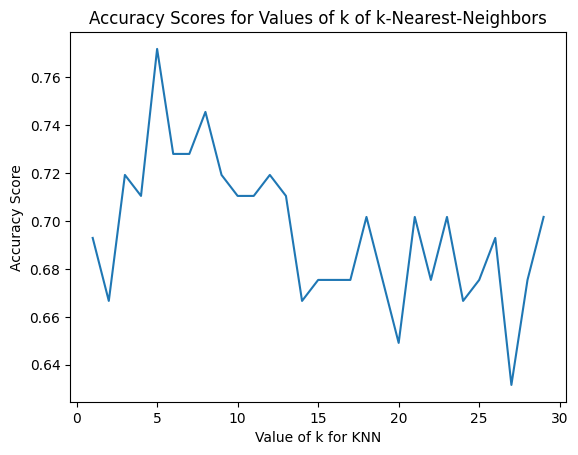

In [ ]:
k_range = list(range(1,30))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print ('-------------', k, '-------------------')
    print(metrics.confusion_matrix(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
scores

[0.6929824561403509,
 0.6666666666666666,
 0.7192982456140351,
 0.7105263157894737,
 0.7719298245614035,
 0.7280701754385965,
 0.7280701754385965,
 0.7456140350877193,
 0.7192982456140351,
 0.7105263157894737,
 0.7105263157894737,
 0.7192982456140351,
 0.7105263157894737,
 0.6666666666666666,
 0.6754385964912281,
 0.6754385964912281,
 0.6754385964912281,
 0.7017543859649122,
 0.6754385964912281,
 0.6491228070175439,
 0.7017543859649122,
 0.6754385964912281,
 0.7017543859649122,
 0.6666666666666666,
 0.6754385964912281,
 0.6929824561403509,
 0.631578947368421,
 0.6754385964912281,
 0.7017543859649122]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
#print accuracy of model
print(metrics.accuracy_score(y_test,y_pred_knn))

0.7456140350877193


In [ ]:
#print precision value of model
print(metrics.precision_score(y_test,y_pred_knn))

0.8


In [ ]:
#print recall value of model
print(metrics.recall_score(y_test,y_pred_knn))

0.7887323943661971


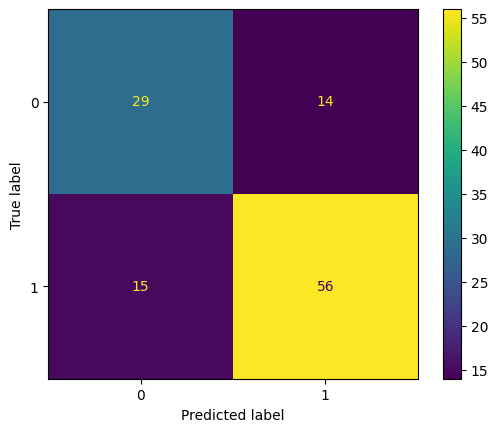

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn.classes_)
disp.plot()
plt.show()